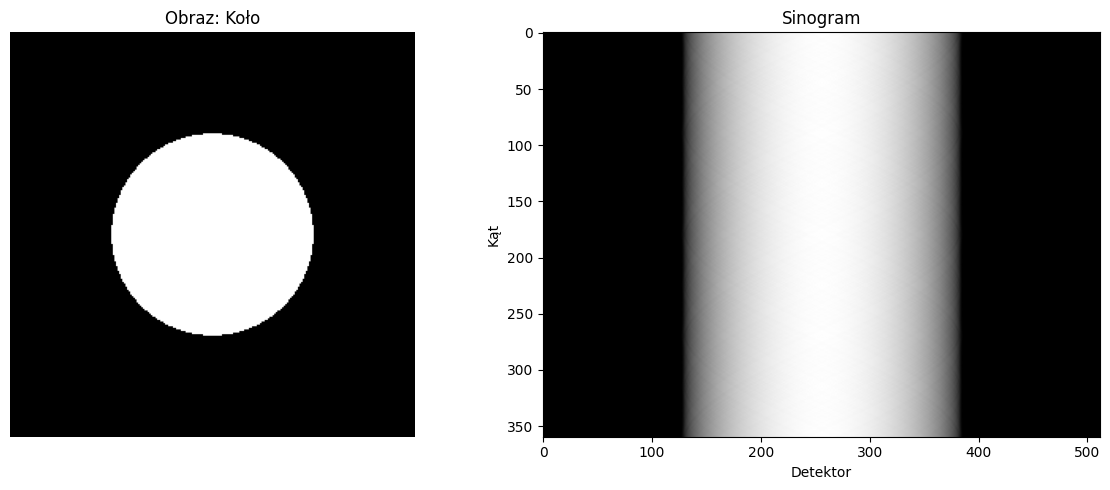

In [2]:
import odl
import numpy as np
import matplotlib.pyplot as plt

# 1. Przestrzeń dyskretna (2D)
space = odl.uniform_discr(
    min_pt=[-1, -1], max_pt=[1, 1], shape=[256, 256], dtype='float32'
)

# 2. Obraz koła (wartość 1 w kole, 0 poza)
phantom = space.one()
grid_x, grid_y = np.meshgrid(
    np.linspace(-1, 1, 256), np.linspace(-1, 1, 256)
)
radius = 0.5
phantom_arr = ((grid_x**2 + grid_y**2) <= radius**2).astype(np.float32)
phantom[:] = phantom_arr

# 3. Geometria projekcji (tu: parallel beam)
angle_partition = odl.uniform_partition(0.0, 2.0 * np.pi, 360)
detector_partition = odl.uniform_partition(-1.0, 1.0, 512)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)

# 4. Operator Radona (projekcja)
ray_trafo = odl.tomo.RayTransform(space, geometry)

# 5. Sinogram (projekcja obrazu)
sinogram = ray_trafo(phantom)

# 6. Wyświetlenie
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Obraz: Koło")
plt.imshow(phantom.asarray(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sinogram")
plt.imshow(sinogram.asarray(), cmap='gray', aspect='auto')
plt.xlabel('Detektor')
plt.ylabel('Kąt')

plt.tight_layout()
plt.show()
